https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/data



In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME = "Stock_Data/Stocks"
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))
%cd /content/drive/My\ Drive/$FOLDERNAME/

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1a-I9epOaGdMqEQjvMO-SGs4iDefnoraJ/Stocks


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")


import plotly.graph_objects as go

import xgboost as xgb

In [ ]:
## Example of how to load a single stock into a Pandas Dataframe.
amtd_df = pd.read_csv('amtd.us.txt')
amtd_df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,7.1722,7.3563,7.1457,7.2511,5375043,0
1,2005-02-28,7.2949,7.3388,7.1194,7.1808,4602417,0
2,2005-03-01,7.1808,7.2597,7.1194,7.1808,5648916,0
3,2005-03-02,7.1457,7.5493,7.0931,7.4439,10262412,0
4,2005-03-03,7.4879,7.6632,7.2949,7.3299,5287947,0


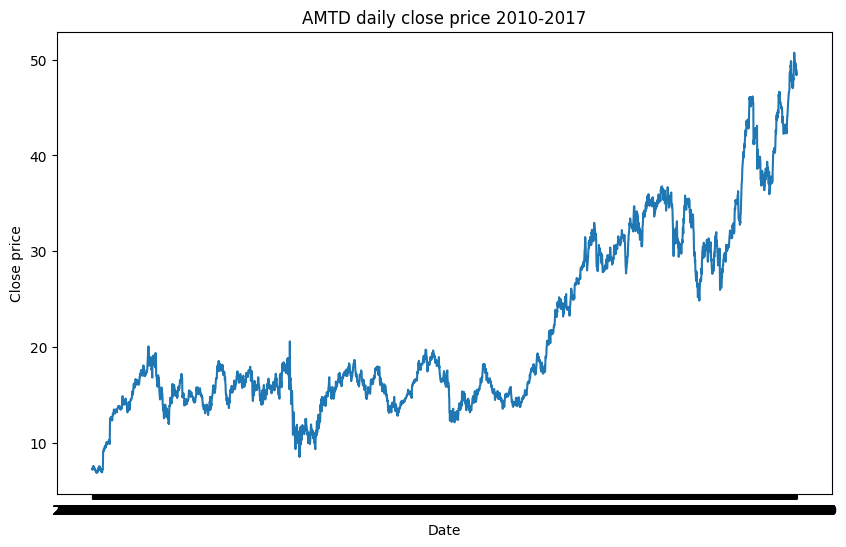

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=amtd_df)
plt.xlabel('Date')
plt.ylabel('Close price')
plt.title('AMTD daily close price 2010-2017')
plt.show()

In [17]:
# Train data = 80% of the whole data set, test 10%, val 10%
train_size = 0.8
test_size = 0.1
validation_size = 0.1

train_end = int(len(amtd_df) * train_size)
test_end = train_end + int(len(amtd_df) * test_size)

train_data = amtd_df.iloc[:train_end]
test_data = amtd_df.iloc[train_end:test_end]
validation_data = amtd_df.iloc[test_end:]

In [18]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=train_data['Date'], y=train_data['Close'], mode='lines', name='Train data'))
fig.add_trace(go.Scatter(x=test_data['Date'], y=test_data['Close'], mode='lines', name='Test data'))
fig.add_trace(go.Scatter(x=validation_data['Date'], y=validation_data['Close'], mode='lines', name='Validation data'))


fig.update_layout(
    title='AMTD daily close price 2010-2017',
    xaxis_title='Date',
    yaxis_title='Close price',
)

fig.show()

In [19]:
X_train = train_data.drop(columns=['Close', 'Date'])
y_train = train_data['Close']
X_validation = validation_data.drop(columns=['Close', 'Date'])
y_validation = validation_data['Close']
X_test = test_data.drop(columns=['Close', 'Date'])

In [20]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [21]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
history = model.fit(X_train,y_train,epochs=50,batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/50
80/80 [==============================] - 12s 38ms/step - loss: 165.7901 - val_loss: 834.9980
Epoch 2/50
80/80 [==============================] - 1s 14ms/step - loss: 58.0857 - val_loss: 672.8813
Epoch 3/50
80/80 [==============================] - 1s 14ms/step - loss: 43.5102 - val_loss: 591.9124
Epoch 4/50
80/80 [==============================] - 1s 14ms/step - loss: 39.5974 - val_loss: 555.4697
Epoch 5/50
80/80 [==============================] - 1s 14ms/step - loss: 39.5764 - val_loss: 545.6628
Epoch 6/50
80/80 [==============================] - 1s 14ms/step - loss: 39.7457 - val_loss: 540.7304
Epoch 7/50
80/80 [==============================] - 1s 14ms/step - loss: 39.4099 - val_loss: 542.5678
Epoch 8/50
80/80 [==============================] - 1s 14ms/step - loss: 39.3142 - val_loss: 540.5371
Epoch 9/50
80/80 [==============================] - 2s 22ms/step - loss: 39.6760 - val_loss: 540.2823
Epoch 10/50
80/80 [==============================] - 2s 22ms/step - loss: 39.081

In [22]:
test_preds = model.predict(X_test)

10/10 [==============================] - 2s 8ms/step


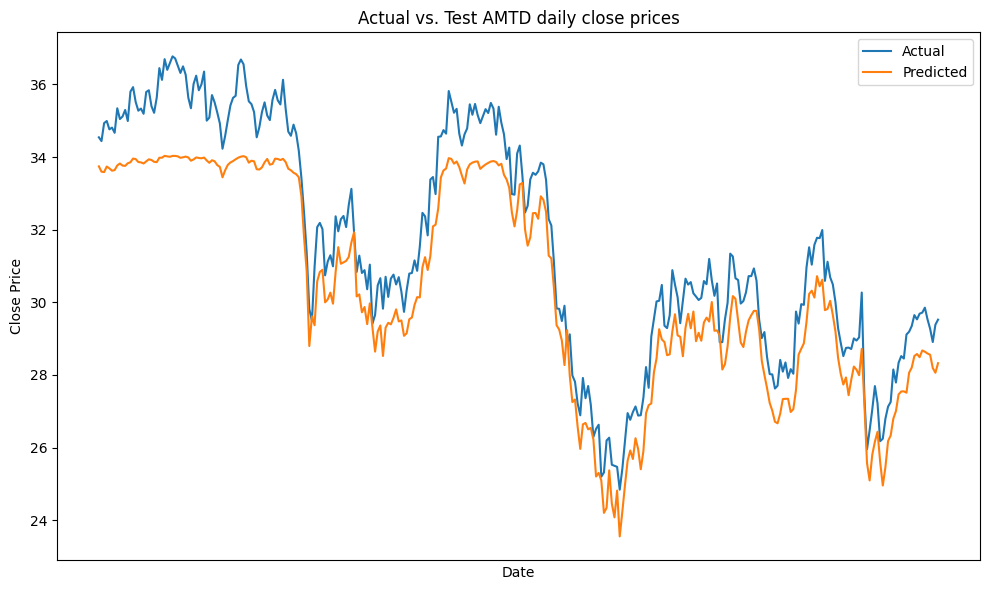

In [23]:
# Actual vs test
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], test_data['Close'], label='Actual')
plt.plot(test_data['Date'], test_preds, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Test AMTD daily close prices')
plt.legend()
plt.xticks([])
plt.tight_layout()
plt.show()

In [24]:
import pandas as pd
import glob

# List all CSV files in the current directory
csv_files = ['aa.us.txt', 'abb.us.txt', 'aau.us.txt']

# Create an empty DataFrame to store merged data
merged_data = None

# Read and merge data from all CSV files
for file in csv_files:
    stock_data = pd.read_csv(file)
    if merged_data is None:
      merged_data = stock_data
    else:
      merged_data = pd.merge(merged_data, stock_data, on='Date', how='outer')

merged_data.dropna(inplace=True)
print(merged_data.head())

# Calculate correlation for each pair of stocks
correlation_matrix = merged_data.corr()

print(correlation_matrix)


            Date  Open_x  High_x   Low_x  Close_x  Volume_x  OpenInt_x  \
8872  2005-02-25  65.687  66.812  65.561   66.039   2935168          0   
8873  2005-02-28  66.565  67.170  66.290   67.063   3229626          0   
8874  2005-03-01  67.042  67.421  65.875   66.104   2386346          0   
8875  2005-03-02  65.561  66.016  64.770   65.353   1973783          0   
8876  2005-03-03  65.977  66.227  64.889   65.310   1857445          0   

      Open_y  High_y   Low_y  Close_y  Volume_y  OpenInt_y  Open  High   Low  \
8872  4.4844  4.5556  4.4765   4.5082  319324.0        0.0  1.58  1.58  1.53   
8873  4.5873  4.5873  4.4685   4.5082  534773.0        0.0  1.64  1.64  1.54   
8874  4.5479  4.5873  4.5399   4.5717  409945.0        0.0  1.53  1.61  1.53   
8875  4.5717  4.5954  4.5399   4.5636  239933.0        0.0  1.53  1.53  1.53   
8876  4.6112  4.6666  4.5873   4.6270  962639.0        0.0  1.54  1.54  1.49   

      Close   Volume  OpenInt  
8872   1.58   8570.0      0.0  
8873   1.6